# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

**1. Is the distribution of body temperatures normal?**

In [17]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

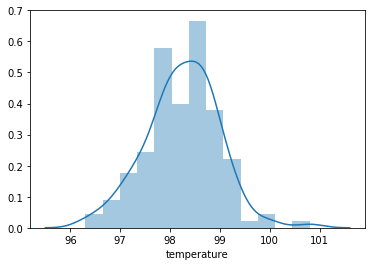

In [6]:
sns.distplot(df.temperature, hist=True)

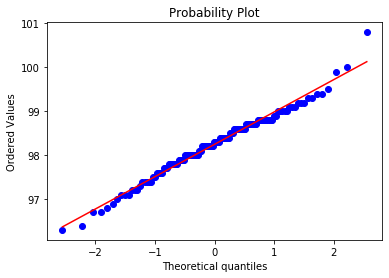

In [13]:
_=stats.probplot(df.temperature,plot=plt)
plt.show()


In [128]:
stats.anderson(df.temperature)

AndersonResult(statistic=0.5201038826714921, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

First, we use graphical methods such as a histogram and normal probability plot to test for the data's normality. The histogram shows us that the histogram does roughly resemble a bell shaped curve. The probability plot further confirms this since the data points plotted fall approximately on a straight line (with some outliers).

Another way of checking is through the Anderson-Darling test which we can do using the scipy function scipy.stats.anderson. We see that our statistic, 0.52, is not higher than any of the critical values given which means we fail to reject the null that the distribution is normal.

**2) Is the sample size large? Are the observations independent?**

n=130 does not seem like a large sample size considering that this study's main goal is to calculate the true normal **human** body temperature. This means the true population would quite literally be the world's population. 

Since the sampe size is <=10% of the popularion, we can assume independence among the observations.

**3) Is the true population mean really 98.6 degrees F?**

*Testing using the boostrap hypothesis test*

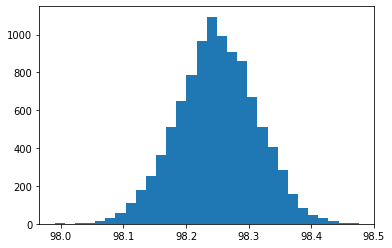

array([98.12230769, 98.37076923])

In [30]:
def bs_replicate(data,func):
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)

bs_replicates=np.empty(10000)

for i in range(10000):
    bs_replicates[i]=bs_replicate(df.temperature,np.mean)

_=plt.hist(bs_replicates, bins=30)
plt.show()

np.percentile(bs_replicates, [2.5,97.5])

Since 98.6 doesn't lie between the 95% confidence interval, we reject the null that the mean is 98.6

In [41]:
np.mean(df.temperature)

98.24923076923075

*Do we use a one-sample or two-sample test?*

Since we're only comparing one sample mean to the hypothesized population mean, we use a one-sample test.

*In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?*

Since we don't know the population standard deviation, we use the t statistic

In [149]:
t,p = stats.ttest_1samp(df.temperature,98.6)

print('the t statistic is: %f'%t)
print('the p-value is: %.10f'%p)

if p>0.01:
    print ('we fail to reject the null; the true mean population IS 98.6')
else:
    print('we reject the null; the true mean population IS NOT 98.6')

the t statistic is: -5.454823
the p-value is: 0.0000002411
we reject the null; the true mean population IS NOT 98.6


*Now try using the other test. How is the result be different? Why?*

In [150]:
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(df.temperature, x2=None, value=98.6)
print('the z score is: %f'%ztest)
print('the p-value is: %.10f'%pval)
if pval>0.01:
    print ('we fail to reject the null; the true mean population IS 98.6')
else:
    print('we reject the null; the true mean population IS NOT 98.6')

the z score is: -5.454823
the p-value is: 0.0000000490
we reject the null; the true mean population IS NOT 98.6


We still end up rejecting the null. Even if we set alpha = .01, we still reject the null in both cases. This is because even if we don't know the population SD, the z test is still applicable since n>30, which means the sample standard deviation is a good indicator of the population SD.

**4) Draw a small sample of size 10 from the data and repeat both frequentist tests.**
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?


Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [154]:
sample = df.sample(10)

In [159]:
#t test

ts,ps = stats.ttest_1samp(sample.temperature,98.6)

print('the t statistic is: %f'%ts)
print('the p-value is: %.10f'%ps)

if ps>0.01:
    print ('we fail to reject the null; the true mean population IS 98.6')
else:
    print('we reject the null; the true mean population IS NOT 98.6')

the t statistic is: -4.481860
the p-value is: 0.0015283230
we reject the null; the true mean population IS NOT 98.6


In [158]:
#z test

s_ztest ,s_pval = stests.ztest(sample.temperature, x2=None, value=98.6)

print('the z statistic is:%f'%s_ztest)
print('the p-value is:%.10f'%s_pval)

if s_pval>0.01:
    print ('we fail to reject the null; the true mean population IS 98.6')
else:
    print('we reject the null; the true mean population IS NOT 98.6')


the z statistic is:-4.481860
the p-value is:0.0000073995
we reject the null; the true mean population IS NOT 98.6


The t-statistic is the correct one to use in this one since n<30. When the sample size is small, the sample standard deviation is no longer a good approximation for the population standard deviation, hence, the z test would not be as accurate. 


**5) At what temperature should we consider someone's temperature to be "abnormal"?**
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

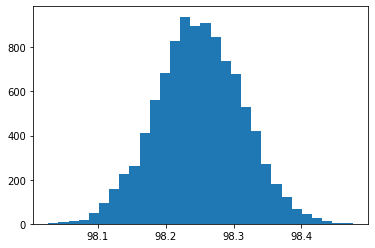

array([98.12230769, 98.37076923])

In [165]:
#bootstrapping

temp_replicates=np.empty(10000)

for i in range(10000):
    temp_replicates[i]=bs_replicate(df.temperature,np.mean)

_=plt.hist(temp_replicates, bins=30)
plt.show()

np.percentile(bs_replicates, [2.5,97.5])


In [226]:
avg = np.mean(df.temperature)
std=np.std(df.temperature)
 
moe=(1.96*std)/(len(df)**.5)

upper=avg-moe
lower=avg+moe

print('In a 95%'+' confidence interval, our margin of error is: %f'%moe)
print('95%'+' confidence interval:(%f,%f)'%(upper,lower))


In a 95% confidence interval, our margin of error is: 0.125551
95% confidence interval:(98.123680,98.374782)


Any temperature that lies oustide our 95% confidence interval of (98.12,98.37) can be considered 'abnormal'.

**6) Is there a significant difference between males and females in normal temperature?**
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

null hypothesis: there is no difference between the normal temperature of males and females


alternative hypothesis: there is a difference between the normal temperature of males and females

In [321]:
fem = df[df['gender']=='F'].temperature
male = df[df['gender']=='M'].temperature

avg_f=np.mean(fem)
avg_m=np.mean(male)
avg_diff=avg_f-avg_m

sd_f=np.std(fem)
sd_m=np.std(male)
sd_w=(((sd_f**2/(len(fem)))+(sd_m**2/(len(male))))**.5)

t_stat=(avg_diff)/sd_w

#critical value for n=130, p=0.05
cv=1.96

print('tstat: %f'%t_stat)

if abs(t_stat)<=cv:
    print('We fail to reject the null')
else:
    print ('We reject the null; there is a difference between the average body temperature of males and females')

    

tstat: 2.303220
We reject the null; there is a difference between the average body temperature of males and females


In [322]:
#another way to check is to see if 0 is within the 95% confidence interval
#of the difference between both means

upper1=avg_diff+sd_w
lower1=avg_diff-sd_w

print('95% '+ 'confidence interval: (%f,%f)'%(lower1,upper1))

if lower1<=0 and upper1>0:
    print('We fail to reject the null')
else:
    print ('We reject the null; there is a difference between the average body temperature of males and females')

    

95% confidence interval: (0.163654,0.414807)
We reject the null; there is a difference between the average body temperature of males and females


6) Is there a significant difference between males and females in normal temperature? What testing approach did you use and why? Write a story with your conclusion in the context of the original problem.

Yes, according to the two sided t test ran above, we conclude that there is a significant difference between the two groups. This is important to note because this means having a this concept of a "normal human body temperature" is problematic since this should depend on one's gender,  and most likely along with their age (normal temperature for children vs. adults), and many more. Furthermore, the true normal human body temperature is not 98.6. By conducting this study with 130 random individuals, we see that it's actually much lower. 